In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\

In [2]:
# read yrbook_remote data
mean_yield_yrbook = pd.read_pickle('./Data/Yearbook_link_remote.pkl')

In [3]:
# get the mean_yield data of wheat and cron
mean_yield_yrbook_wheat = mean_yield_yrbook[mean_yield_yrbook['Crop']=='Wheat']
mean_yield_yrbook_corn = mean_yield_yrbook[mean_yield_yrbook['Crop']=='Corn']

##### RNN model for wheat

In [4]:
# convert the data into array
X = np.array([in_df.drop(['Date','NAME'],1).values for in_df in mean_yield_yrbook_wheat['In_feature'].values])
y = np.array(mean_yield_yrbook_wheat['Value']).reshape(-1,1)

In [5]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# standardize the data
scaler = MinMaxScaler()

# convert the data from 3d to 2d
X_train_2d = X_train.reshape(-1,X_train.shape[2])
X_test_2d = X_test.reshape(-1,X_test.shape[2])

# stadardized the 2d data
X_train_2d_standard = scaler.fit_transform(X_train_2d)
X_test_2d_standard = scaler.transform(X_test_2d)

# reshape the 2d data back to 3d
X_train_standard = X_train_2d_standard.reshape(X_train.shape)
X_test_standard = X_test_2d_standard.reshape(X_test.shape)

##### Built the RNN model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,BatchNormalization,Dropout
from tensorflow.keras.optimizers import SGD

In [56]:
regressior = Sequential()

regressior.add(LSTM(units=120,input_shape = (X_train.shape[1:])))
regressior.add(Dropout(0.5))

regressior.add(Dense(units=1))

In [57]:
regressior.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 120)               61440     
_________________________________________________________________
dropout_13 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 121       
Total params: 61,561
Trainable params: 61,561
Non-trainable params: 0
_________________________________________________________________


In [58]:
regressior.compile(optimizer='adam',loss='mse')

In [59]:
regressior.fit(X_train_standard,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

Train on 1378 samples, validate on 345 samples
Epoch 1/10
1378/1378 [==============================] - 7s 5ms/sample - loss: 31623861.9158 - val_loss: 30778558.8000
Epoch 2/10
1378/1378 [==============================] - 7s 5ms/sample - loss: 31562759.8229 - val_loss: 30774958.8812
Epoch 3/10
1378/1378 [==============================] - 7s 5ms/sample - loss: 31513562.4906 - val_loss: 30775242.4928
Epoch 4/10
1378/1378 [==============================] - 7s 5ms/sample - loss: 31479693.6923 - val_loss: 30774541.2058
Epoch 5/10
1378/1378 [==============================] - 7s 5ms/sample - loss: 31452947.3004 - val_loss: 30771627.3159
Epoch 6/10
1378/1378 [==============================] - 7s 5ms/sample - loss: 31431543.5181 - val_loss: 30770412.5797
Epoch 7/10
1378/1378 [==============================] - 7s 5ms/sample - loss: 31413747.2134 - val_loss: 30771979.2174
Epoch 8/10
1378/1378 [==============================] - 7s 5ms/sample - loss: 31395940.7199 - val_loss: 30770927.0609
Epoch 9/1

<AxesSubplot:>

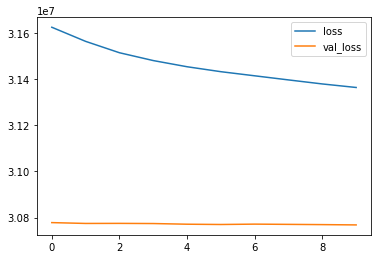

In [60]:
pd.DataFrame(regressior.history.history).plot()